Consensus analysis of crowdsourced Zooniverse labels of imagery from Bosque del Apache and Maxwell NWR, Ladd S Gordon Waterfowl Complex, Rio Grande State Park
Created by: Rowan Converse
Start Date: 2023 - 03 - 07

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import ast

In [2]:
#Analysis annotations
dgc_path = "C:/Users/rowanconverse/OneDrive - University of New Mexico/Dissertation/1_Chapter/consensus/data/crowdsourced/20230307_zooniverseanalysislabels.csv"
with open(dgc_path) as f:
  dgc = pd.read_csv(f)
seagull_path = "C:/Users/rowanconverse/OneDrive - University of New Mexico/Dissertation/1_Chapter/consensus/data/crowdsourced/20230307_zooniverseanalysislabels_seagull.csv"
with open(seagull_path) as f:
  seagull = pd.read_csv(f)

#Refined annotations
#Drops
#ref_dgc = "/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/Dissertation/1_Chapter/consensus/data/crowdsourced/20230307_zooniverseconsensuslabels.csv"
#with open(ref_dgc) as f:
#  ref_zoo = pd.read_csv(f)
#ref_seagull = "/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/Dissertation/1_Chapter/consensus/data/crowdsourced/20230307_zooniverseconsensuslabels_seagull.csv"
#with open(ref_seagull) as f:
#  ref_sea = pd.read_csv(f)
#No Drops
#dgc_nodrops = "/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/Dissertation/1_Chapter/consensus/data/crowdsourced/20230307_zooniverseconsensuslabels_nodrops.csv"
#with open(dgc_nodrops) as f:
#  zoo_nodrops = pd.read_csv(f)
#seagull_nodrops = "/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/Dissertation/1_Chapter/consensus/data/crowdsourced/20230307_zooniverseconsensuslabels_seagull_nodrops.csv"
#with open(seagull_nodrops) as f:
#  sea_nodrops = pd.read_csv(f)

In [4]:
#Raw annotations
dgc = pd.read_json("C:/Users/rowanconverse/OneDrive - University of New Mexico/CV4Ecology/Prototyping/Data/Labels/coco/20220227_dgc.json")
seagull = pd.read_json("C:/Users/rowanconverse/OneDrive - University of New Mexico/CV4Ecology/Prototyping/Data/Labels/coco/20220227_seagull.json")


In [5]:
print(seagull["filename"].nunique())
print(dgc["filename"].nunique())

3066
27885


In [87]:
#Group the DataFrame by filename and labeler ID, and count the number of bounding boxes per labeler
grouped = dgc.groupby(['filename', 'labeler_id']).size().reset_index(name='bbox_count')

#Filter filenames to keep only images where all labelers have the same number of bounding boxes (by counting the number of unique label counts, and keeping only the ones where the number of unique counts is 1)
valid_filenames = grouped.groupby('filename')['bbox_count'].transform('nunique') == 1

#Create a new DataFrame with the filtered annotations
filtered_df = grouped[valid_filenames]
filtered_df = filtered_df.reset_index(drop=True)
mylist = filtered_df["filename"].unique().tolist()
valid_annotations = dgc[dgc['filename'].isin(mylist)]

#Save to a new CSV file
valid_annotations.to_csv('C:/Users/rowanconverse/Desktop/texture/valid_dgc.csv', index=False)

num_unique_images = len(filtered_df['filename'].unique())
num_annotations = len(valid_annotations)

print("Number of valid images: {num_unique_images}")
print("Number of valid annotations: {num_annotations}")

Number of valid images: {num_unique_images} 
Number of valid annotations: {num_annotations}


In [11]:
#Subset this dataframe by the ones with the same category IDs

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('C:/Users/rowanconverse/Desktop/texture/valid_dgc.csv')
#df = pd.read_csv('C:/Users/rowanconverse/Desktop/texture/valid_seagull.csv')

# Step 1: Group the DataFrame by filename, labeler ID, and category, and count the number of bounding boxes per labeler
grouped = df.groupby(['filename', 'labeler_id', 'category']).size().reset_index(name='bbox_count')

# Step 2: Filter filenames to keep only images where all labelers have the same number of bounding boxes as the first labeler, per category
valid_filenames = grouped.groupby(['filename', 'category'])['bbox_count'].transform('nunique') == 1

# Step 3: Create a new DataFrame with the filtered annotations
filtered_df = grouped[valid_filenames]

# Step 4: Save the annotations of valid filenames to a new DataFrame
valid_annotations = df[df['filename'].isin(filtered_df['filename'])]
#valid_annotations.to_csv('C:/Users/rowanconverse/Desktop/texture/classvalid_seagull.csv', index=False)

# Step 5: Print the valid annotations DataFrame
print(len(filtered_df['filename'].unique()))
print(len(valid_annotations))

9866
185202


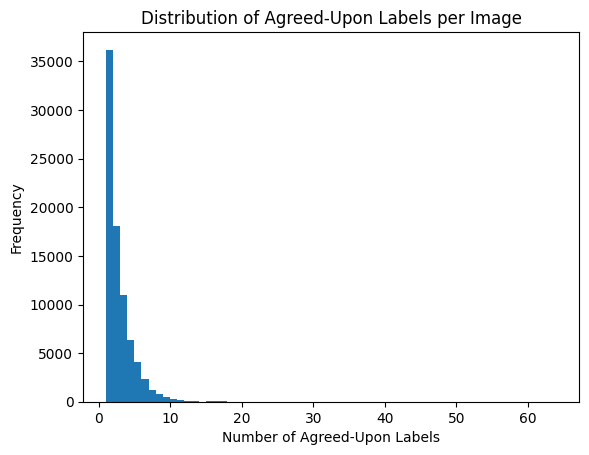

In [90]:
# Plot the distribution of the number of agreed-upon labels per image
plt.hist(filtered_df['bbox_count'], bins=range(min(filtered_df['bbox_count']), max(filtered_df['bbox_count']) + 1))
plt.xlabel('Number of Agreed-Upon Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Agreed-Upon Labels per Image')
plt.show()

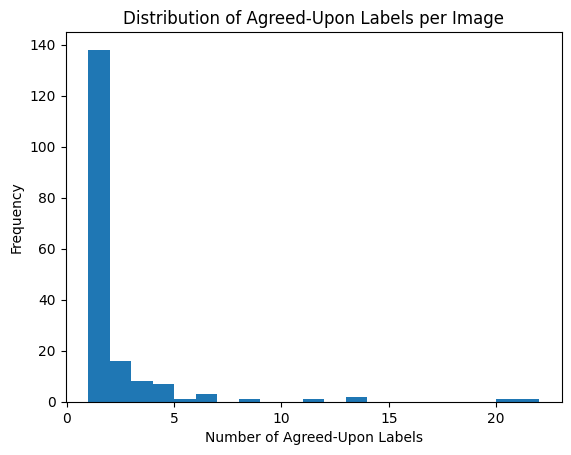

In [16]:
#Get all image tiles where all labelers counted the precise same number of birds

# Group by 'filename' and 'labeler_id' to count the number of bounding boxes per labeler
grouped = seagull.groupby(['filename', 'labeler_id']).size().reset_index(name='bbox_count')

# Group by 'filename' and count the number of unique labelers per image
image_labeler_counts = grouped.groupby('filename')['labeler_id'].nunique().reset_index(name='labeler_count')

# Get the images where all labelers have the same count of bounding boxes
same_bbox_count_images = image_labeler_counts[image_labeler_counts['labeler_count'] == 1]

# Filter the original DataFrame to include only the annotations for the images with the same count of bounding boxes
filtered_df = seagull[seagull['filename'].isin(same_bbox_count_images['filename'])]

# Group by 'filename' and count the number of labels per image
labels_per_image = filtered_df.groupby('filename').size().reset_index(name='label_count')

# Plot the distribution of the number of agreed-upon labels per image
plt.hist(labels_per_image['label_count'], bins=range(min(labels_per_image['label_count']), max(labels_per_image['label_count']) + 1))
plt.xlabel('Number of Agreed-Upon Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Agreed-Upon Labels per Image')
plt.show()


In [19]:
#Get all tiles where all labelers counted the precise number of birds, by category

# Group by 'filename', 'labeler_id', and 'category_id' to count the number of bounding boxes per labeler, per category
grouped = filtered_df.groupby(['filename', 'labeler_id', 'category']).size().reset_index(name='bbox_count')

# Group by 'filename' and 'labeler_id' to count the total number of bounding boxes per labeler
labeler_total_bbox_count = grouped.groupby(['filename', 'labeler_id'])['bbox_count'].sum().reset_index(name='total_bbox_count')

# Group by 'filename' and 'category_id' to count the total number of bounding boxes per category
category_total_bbox_count = grouped.groupby(['filename', 'category'])['bbox_count'].sum().reset_index(name='total_bbox_count')

# Merge the two groupby results
merged = pd.merge(labeler_total_bbox_count, category_total_bbox_count, on=['filename'])

# Filter the DataFrame to include only the images where count of bounding boxes per labeler, per category matches precisely
filtered_df_matched_counts = filtered_df[filtered_df['filename'].isin(merged['filename'])]

len(merged)


189

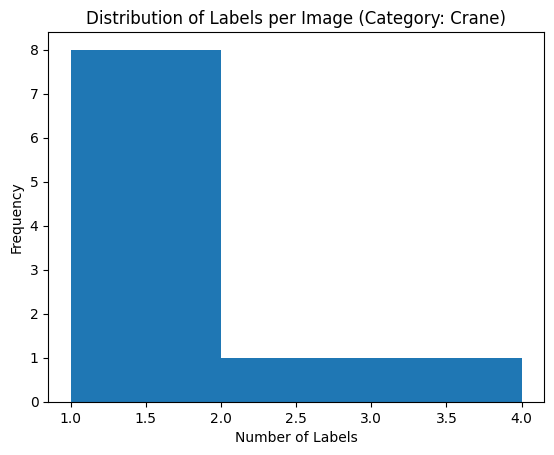

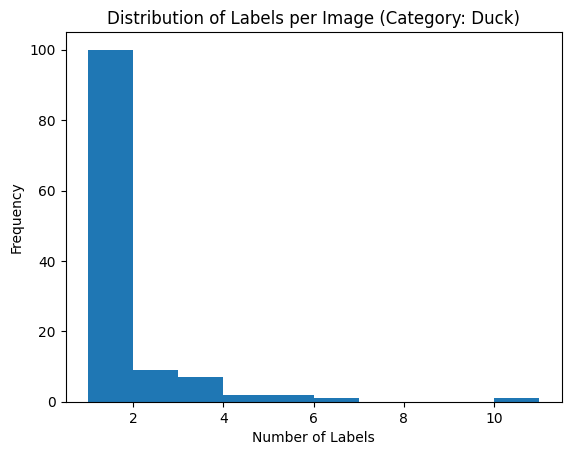

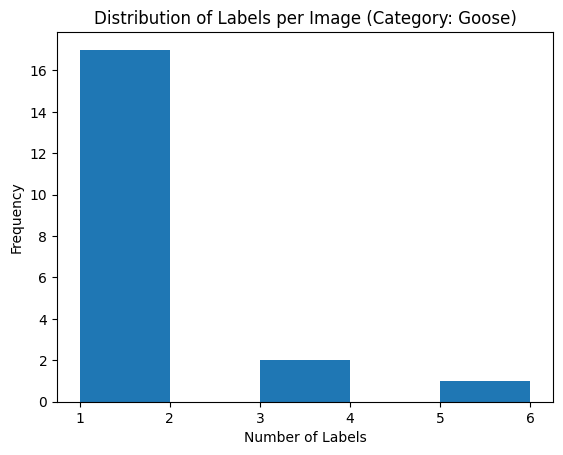

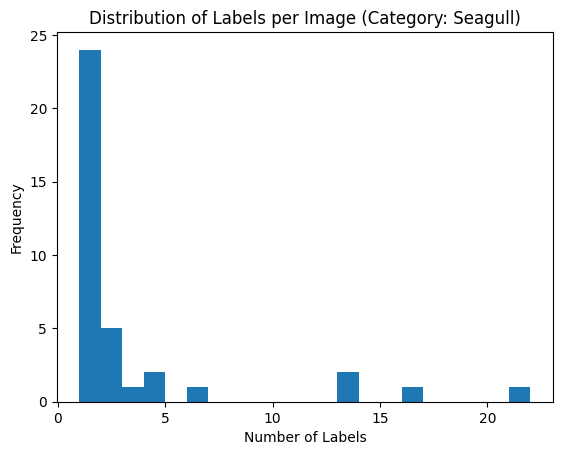

In [20]:
#Distribution graph of the number of birds per image, by category

# Group by 'category_id' and 'filename' to count the number of labels per image, per category
grouped = filtered_df_matched_counts.groupby(['category', 'filename']).size().reset_index(name='label_count')

# Iterate over each unique category
for category in grouped['category'].unique():
    # Filter the DataFrame for the current category
    category_df = grouped[grouped['category'] == category]

    # Plot the distribution of the number of labels per image for the current category
    plt.hist(category_df['label_count'], bins=range(min(category_df['label_count']), max(category_df['label_count']) + 1))
    plt.xlabel('Number of Labels')
    plt.ylabel('Frequency')
    plt.title('Distribution of Labels per Image (Category: {})'.format(category))
    plt.show()

In [23]:
#Determining the number of missing images due to bad clustering

#Refined dataset statistics
dropsea = len(ref_sea["filename"].unique())
nodropsea = len(sea_nodrops["filename"].unique())
missea = nodropsea - dropsea
persea = missea / nodropsea

print("%s seagull images were removed due to bad clustering, or %s percent of the total"%(missea,persea))

drop = len(ref_zoo["filename"].unique())
nodrop = len(zoo_nodrops["filename"].unique())
misszoo = nodrop - drop
perzoo = misszoo / nodrop
print("%s DGC images were removed due to bad clustering, or %s percent of the total"%(misszoo,perzoo))
#ref_zoo.head()
#ref_sea["category_id"].value_counts()

362 seagull images were removed due to bad clustering, or 0.11806914546640573 percent of the total
2236 DGC images were removed due to bad clustering, or 0.08018648018648018 percent of the total


In [24]:
#Number of missing labels due to bad clustering

missing = dgc[dgc["cluster_id"] == -1]
len(missing)

196693

In [25]:
#Fixing how bounding boxes are read for the analysis labels
def eval_bbox_refined(row):
    if pd.notnull(row['bbox_refined']):
        return ast.literal_eval(row['bbox_refined'])
    else:
        return None

# Apply the function to the 'bbox_refined' column and save the results
dgc['bbox_refined'] = dgc.apply(eval_bbox_refined, axis=1)
dgc["bbox_refined"][0][0]


634.05224609375

In [26]:
#Creating a base file column to match tiles to full images later
ref_zoo["basefile"] = [x[:-10] for x in ref_zoo['filename']]
ref_zoo.head()

,annotation_id,filename,category_id,bbox,category,basefile
0,1,20211201_Atrisco_0459_01_01.png,2,"[634.05224609375, 260.4735412597656, 49.0, 80....",Goose,20211201_Atrisco_0459
1,2,20211201_Atrisco_0459_01_01.png,2,"[555.4261474609375, 216.25, 53.0, 69.0]",Goose,20211201_Atrisco_0459
2,3,20211201_Atrisco_0459_01_01.png,2,"[266.75, 120.83124542236328, 60.33087158203125...",Goose,20211201_Atrisco_0459
3,4,20211201_Atrisco_0459_01_01.png,2,"[176.8125, 22.46035385131836, 52.0, 84.0]",Goose,20211201_Atrisco_0459
4,5,20211201_Atrisco_0459_01_01.png,2,"[101.36946105957031, 170.06580352783203, 62.24...",Goose,20211201_Atrisco_0459


In [27]:
#Figuring out the true number of unique images, not just image tiles
len(ref_zoo["basefile"].unique())

1032

In [28]:
#Calculating IOU for each individual box in the dataset to make a per-label score

import pandas as pd
from shapely.geometry import box

def eval_bbox(row, col_name):
    bbox_str = row[col_name]
    if pd.notnull(bbox_str):
        bbox = np.array(ast.literal_eval(bbox_str))
        bbox = bbox.astype(float)
    else:
        bbox = np.array([np.nan, np.nan, np.nan, np.nan])
    return bbox


# Define a function to calculate the IOU only if both bounding boxes are non-null
def calculate_iou(row):
    bbox_orig = eval_bbox(row, 'bbox_orig')
    bbox_ref = eval_bbox(row, 'bbox_refined')
    if np.isnan(bbox_orig[0]) or np.isnan(bbox_orig[1]) or np.isnan(bbox_orig[2]) or np.isnan(bbox_orig[3]) or \
        np.isnan(bbox_ref[0]) or np.isnan(bbox_ref[1]) or np.isnan(bbox_ref[2]) or np.isnan(bbox_ref[3]):
        iou = None
    else:
        bbox_orig = box(bbox_orig[0], bbox_orig[1], bbox_orig[0] + bbox_orig[2], bbox_orig[1] + bbox_orig[3])
        bbox_ref = box(bbox_ref[0], bbox_ref[1], bbox_ref[0] + bbox_ref[2], bbox_ref[1] + bbox_ref[3])
        iou = bbox_orig.intersection(bbox_ref).area / bbox_orig.union(bbox_ref).area
    return iou

# Apply the function to each row of the DataFrame and save the results in a new column
seagull['IOU'] = seagull.apply(calculate_iou, axis=1)
seagull.head()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [3]:
#Merge seagull and dgc datasets
df = pd.concat([dgc, seagull], axis=0)
df.head()

,Unnamed: 0,index,annotation_id,bbox_orig,cat_id_orig,cat_orig,image_id,filename,labeler_id,cluster_id,cat_id_refined,bbox_refined,cat_refined
0,0,956322,956323,"[616.8966064453125, 247.40164184570312, 78.357...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,0,2.0,"[634.05224609375, 260.4735412597656, 49.0, 80....",Goose
1,1,956323,956324,"[555.4261474609375, 212.951171875, 53.36450195...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,1,2.0,"[555.4261474609375, 216.25, 53.0, 69.0]",Goose
2,2,956324,956325,"[351.4253234863281, 212.2756805419922, 69.5764...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,8,2.0,"[369.28125, 237.5530014038086, 61.433685302734...",Goose
3,3,956325,956326,"[261.58392333984375, 108.92428588867188, 66.87...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,2,2.0,"[266.75, 120.83124542236328, 60.33087158203125...",Goose
4,4,956326,956327,"[174.44451904296875, 22.46035385131836, 61.470...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,3,2.0,"[176.8125, 22.46035385131836, 52.0, 84.0]",Goose


In [ ]:
#Calculating area of original annotations 
df['bbox_orig'] = df['bbox_orig'].apply(ast.literal_eval)

def calc_area(row):
    bbox = row['bbox_orig']
    xmin, ymin, w, h = bbox
    return w * h

df['area'] = df.apply(calc_area, axis=1)


cat_id_orig
1    7526.664935
2    3320.921627
3    4601.065124
4    6155.775552
Name: area, dtype: float64

In [ ]:
#Average area of bounding boxes per class
df.groupby("cat_orig")["area"].mean()

cat_orig
Crane         8144.799613
Duck          4601.065124
Goose         4261.981301
Other Bird    6876.181171
Seagull       2728.444808
Name: area, dtype: float64

In [ ]:
#Average IOU overlap per class
df.groupby("cat_refined")["IOU"].mean()

cat_refined
Crane         0.717867
Duck          0.678547
Goose         0.685720
Other Bird    0.694808
Seagull       0.716225
Name: IOU, dtype: float64

In [ ]:
#Overall mean IOU between individual bounding boxes and consensus
df["IOU"].mean()

0.6914906737085704

In [7]:
#CALCULATING PIELOU'S INDEX

# Group the dataframe by image, then by cluster
grouped = df.groupby(['filename', 'cluster_id'])

# Create empty lists to store the results
cluster_id_list = []
filename_list = []
consensus_class_id_list = []
consensus_bbox_list = []
pielou_index_list = []

# Loop through each group and calculate Pielou's evenness index
for name, group in grouped:
    # Get the cluster ID, filename, and consensus class ID for this group
    cluster_id = name[1]
    filename = name[0]
    consensus_class_id = group['cat_refined'].iloc[0]  # Assumes all consensus IDs in the group are the same
    consensus_bbox = group['bbox_refined'].iloc[0]
    
    # Count the number of annotations in the group
    num_annotations = len(group)
    
    # Count the number of annotations for each original class ID
    class_counts = group.groupby('cat_orig').size().values
    
    #NEW CODE: Recode any complete agreement as 0
    if len(class_counts) == 1:
        evenness_index = 0
    else:
        # Calculate the relative abundance of each original class ID
        relative_abundance = class_counts / num_annotations
    
        # Calculate the evenness index using Pielou's formula
        evenness_index = -np.sum(relative_abundance * np.log(relative_abundance)) / np.log(len(relative_abundance))
    
    # Calculate the relative abundance of each original class ID
    #relative_abundance = class_counts / num_annotations
    
    # Calculate the evenness index using Pielou's formula
    #evenness_index = -np.sum(relative_abundance * np.log(relative_abundance)) / np.log(len(relative_abundance))
    
    # Append the results to the lists
    cluster_id_list.append(cluster_id)
    filename_list.append(filename)
    consensus_class_id_list.append(consensus_class_id)
    consensus_bbox_list.append(consensus_bbox)
    pielou_index_list.append(evenness_index)

# Create a new dataframe with the results
pielou = pd.DataFrame({
    'cluster_id': cluster_id_list,
    'filename': filename_list,
    'consensus_class_ID': consensus_class_id_list,
    'consensus_bbox': consensus_bbox_list,
    'pielou_index': pielou_index_list
})

# Display sample of the result dataframe
pielou.head()

,cluster_id,filename,consensus_class_ID,consensus_bbox,pielou_index
0,-1,20211201_Atrisco_0459_01_01.png,NaN,NaN,0.721928
1,0,20211201_Atrisco_0459_01_01.png,Goose,"[634.05224609375, 260.4735412597656, 49.0, 80....",0.764205
2,1,20211201_Atrisco_0459_01_01.png,Goose,"[555.4261474609375, 216.25, 53.0, 69.0]",0.764205
3,2,20211201_Atrisco_0459_01_01.png,Goose,"[266.75, 120.83124542236328, 60.33087158203125...",0.764205
4,3,20211201_Atrisco_0459_01_01.png,Goose,"[176.8125, 22.46035385131836, 52.0, 84.0]",0.764205


In [8]:
print(len(df))
print(len(grouped))
print(len(pielou))

1449301
175146
175146


In [9]:
#ONLY FOR EXPORT-- drop NaN values and check length
export = pielou.dropna()
print(len(export))

147357


In [6]:
#New dependent variables for image factors analysis: total number of guesses that agree with consensus, and fraction of guesses that agree with consensus

import pandas as pd

# Create a dictionary to store counts of class_orig for each group
class_counts_dict = {}

# Group the dataframe by image, then by cluster
grouped = df.groupby(['filename', 'cluster_id'])

# Create empty lists to store the results
cluster_id_list = []
filename_list = []
consensus_class_id_list = []
consensus_bbox_list = []
consensus_guess_list = []
num_annotations_list = []
correct_guess_list = []

# Loop through each group and calculate Pielou's evenness index
for name, group in grouped:
    # Get the cluster ID, filename, and consensus class ID for this group
    cluster_id = name[1]
    filename = name[0]
    consensus_class_id = group['cat_refined'].iloc[0]  # Assumes all consensus IDs in the group are the same
    consensus_bbox = group['bbox_refined'].iloc[0]

    # Count the number of annotations in the group
    num_annotations = len(group)

    # Create a list of class_orig values for this group
    class_orig_values = group['cat_orig'].tolist()

    # Count the number of times each class_orig appears in this group
    class_counts = pd.Series(class_orig_values).value_counts()

    # Count the number of times the consensus class appears
    consensus_count = class_counts.get(consensus_class_id, 0)

    # Calculate the proportion of correct guesses
    proportion_correct = consensus_count / num_annotations

    # Append the results to the lists
    cluster_id_list.append(cluster_id)
    filename_list.append(filename)
    consensus_class_id_list.append(consensus_class_id)
    consensus_bbox_list.append(consensus_bbox)
    num_annotations_list.append(num_annotations)
    consensus_guess_list.append(consensus_count)
    correct_guess_list.append(proportion_correct)

# Create a new dataframe with the results
summary = pd.DataFrame({
    'cluster_id': cluster_id_list,
    'filename': filename_list,
    'consensus_class_ID': consensus_class_id_list,
    'consensus_bbox': consensus_bbox_list,
    'num_annotations': num_annotations_list,
    'consensus_guesses': consensus_guess_list,
    'correct_fraction': correct_guess_list
})

# Display a sample of the result dataframe
summary.head()


,cluster_id,filename,consensus_class_ID,consensus_bbox,num_annotations,consensus_guesses,correct_fraction
0,-1,20211201_Atrisco_0459_01_01.png,NaN,NaN,10,0,0.000000
1,0,20211201_Atrisco_0459_01_01.png,Goose,"[634.05224609375, 260.4735412597656, 49.0, 80....",9,7,0.777778
2,1,20211201_Atrisco_0459_01_01.png,Goose,"[555.4261474609375, 216.25, 53.0, 69.0]",9,7,0.777778
3,2,20211201_Atrisco_0459_01_01.png,Goose,"[266.75, 120.83124542236328, 60.33087158203125...",9,7,0.777778
4,3,20211201_Atrisco_0459_01_01.png,Goose,"[176.8125, 22.46035385131836, 52.0, 84.0]",9,7,0.777778


In [7]:
print(len(df))
print(len(grouped))
print(len(summary))

1449301
175146
175146


In [8]:
#ONLY FOR EXPORT-- drop NaN values and check length
export = summary.dropna()
print(len(export))
savepath = "C:\\Users\\rowanconverse\\OneDrive - University of New Mexico\\Projects\\DronesForDucks\\Data\\Labels\\PowerAnalysis\\"
export.to_csv(savepath+"consensusLabels_simple.csv")

147357


In [12]:
savepath = "C:\\Users\\rowanconverse\\OneDrive - University of New Mexico\\Projects\\DronesForDucks\\Data\\Labels\\PowerAnalysis\\"
export.to_csv(savepath+"consensusLabels_simple.csv")

In [5]:
#Average Overall Pielou's Index
print(pielou["pielou_index"].mean())
print(pielou["pielou_index"].std())

0.27013856443242523
0.3484775751869892


In [6]:
#Pielou's Index average per class
print(pielou.groupby("consensus_class_ID")["pielou_index"].mean())
print(pielou.groupby("consensus_class_ID")["pielou_index"].std())

consensus_class_ID
Crane         0.182399
Duck          0.228603
Goose         0.714145
Other Bird    0.861734
Seagull       0.283877
Name: pielou_index, dtype: float64
consensus_class_ID
Crane         0.271580
Duck          0.317838
Goose         0.255837
Other Bird    0.165835
Seagull       0.322362
Name: pielou_index, dtype: float64


In [ ]:
#CONSENSUS CHECK: COMPARING COUNTS BETWEEN COMMON IMAGES LABELED BY EXPERTS AND THE CROWD

#Directory of original filenames for expert labeled images-- currently only found 1, need to match the other 11 tomorrow
imgpath = r"/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Imagery/USFWS/raw"
imglist = os.listdir(imgpath)
imglist = [s.strip('.JPG') for s in imglist]

#filter the refined labels to only those that match the expert list
expertmatch = ref_zoo[ref_zoo["basefile"].isin(imglist)]
print(len(expertmatch))
print(len(expertmatch["basefile"].unique()))

2175
12


In [ ]:
#Export the match file as its own subset
savepath = "/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/Dissertation/1_Chapter/consensus/data/"
expertmatch.to_csv(savepath+"zooniverseconsensus_expertmatch.csv")

In [ ]:
#Re-doing the area per class calculations for the benchmark images only 

df["basefile"] = [x[:-10] for x in df['filename']]
expertmatch = df[df["basefile"].isin(imglist)]
#expertmatch['bbox_orig'] = expertmatch['bbox_orig'].apply(ast.literal_eval)

def calc_area(row):
    bbox = row['bbox_orig']
    xmin, ymin, w, h = bbox
    return w * h

expertmatch['area'] = expertmatch.apply(calc_area, axis=1)

/var/folders/21/q9_tvtjj53n6mfprd_174cz00000gn/T/ipykernel_56861/398377662.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expertmatch['area'] = expertmatch.apply(calc_area, axis=1)


In [ ]:
#BBox area per class for the benchmark set only
expertmatch.groupby('cat_orig')["area"].mean()

cat_orig
Crane         18183.886070
Duck           5384.526137
Goose          5416.469762
Other Bird     7108.927604
Name: area, dtype: float64

In [18]:
#Labeler statstics-- average, std, variance, mode, range on the number of bboxes per labeler
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)
range = dgc.groupby("labeler_id")["bbox_orig"].count()
print(minmax(range))
print(range.std())
print(range.var())
print(range.mode())

(1, 112568)
1993.1388053337373
3972602.297327197
0    1
Name: bbox_orig, dtype: int64


In [7]:
df.head()

,Unnamed: 0,index,annotation_id,bbox_orig,cat_id_orig,cat_orig,image_id,filename,labeler_id,cluster_id,cat_id_refined,bbox_refined,cat_refined
0,0,956322,956323,"[616.8966064453125, 247.40164184570312, 78.357...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,0,2.0,"[634.05224609375, 260.4735412597656, 49.0, 80....",Goose
1,1,956323,956324,"[555.4261474609375, 212.951171875, 53.36450195...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,1,2.0,"[555.4261474609375, 216.25, 53.0, 69.0]",Goose
2,2,956324,956325,"[351.4253234863281, 212.2756805419922, 69.5764...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,8,2.0,"[369.28125, 237.5530014038086, 61.433685302734...",Goose
3,3,956325,956326,"[261.58392333984375, 108.92428588867188, 66.87...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,2,2.0,"[266.75, 120.83124542236328, 60.33087158203125...",Goose
4,4,956326,956327,"[174.44451904296875, 22.46035385131836, 61.470...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,3,2.0,"[176.8125, 22.46035385131836, 52.0, 84.0]",Goose


In [38]:
#INDIVIDUAL LABELER METRICS
#Goal: report avg count, ID consensus across images, break down by morphological group; also min/max individual vs group consensus

df['agree'] = 0
df.loc[df['cat_orig'] == df["cat_refined"], 'agree'] = 1
df.head()

#avg_agree = dgc.groupby("labeler_id")["agree"].value_counts().reset_index

,Unnamed: 0,index,annotation_id,bbox_orig,cat_id_orig,cat_orig,image_id,filename,labeler_id,cluster_id,cat_id_refined,bbox_refined,cat_refined,agree
0,0,956322,956323,"[616.8966064453125, 247.40164184570312, 78.357...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,0,2.0,"[634.05224609375, 260.4735412597656, 49.0, 80....",Goose,0
1,1,956323,956324,"[555.4261474609375, 212.951171875, 53.36450195...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,1,2.0,"[555.4261474609375, 216.25, 53.0, 69.0]",Goose,0
2,2,956324,956325,"[351.4253234863281, 212.2756805419922, 69.5764...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,8,2.0,"[369.28125, 237.5530014038086, 61.433685302734...",Goose,0
3,3,956325,956326,"[261.58392333984375, 108.92428588867188, 66.87...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,2,2.0,"[266.75, 120.83124542236328, 60.33087158203125...",Goose,0
4,4,956326,956327,"[174.44451904296875, 22.46035385131836, 61.470...",3,Duck,28077,20211201_Atrisco_0459_01_01.png,4721,3,2.0,"[176.8125, 22.46035385131836, 52.0, 84.0]",Goose,0


In [41]:
print(df['agree'].mean())
print(df['agree'].std())

0.7503872556494475
0.43278903803594354


In [40]:
# Group by species class and calculate the proportion of "yes" values and the count of total values
grouped_data = df.groupby("cat_refined")["agree"].agg(["sum", "count"]).reset_index()

# Calculate the average proportion of "yes" values directly without converting "sum" to an integer
grouped_data["average_agree"] = grouped_data["sum"] / grouped_data["count"]

# Calculate the standard deviation of the "agree" column per species class
grouped_data["std_deviation"] = df.groupby("cat_refined")["agree"].std().reset_index()["agree"]

# Drop unnecessary columns from the grouped data DataFrame
grouped_data.drop(columns=["sum", "count"], inplace=True)

print(grouped_data)

  cat_refined  average_agree  std_deviation
0       Crane       0.950578       0.216747
1        Duck       0.929681       0.255685
2       Goose       0.736053       0.440772
3  Other Bird       0.538333       0.498944
4     Seagull       0.918064       0.274268


In [10]:
dgc.groupby("cat_refined")["agree"].value_counts()

cat_refined  agree
Crane        Yes      213845
             No        10801
Duck         Yes      648905
             No        43760
Goose        Yes       50620
             No        19331
Other Bird   Yes         323
             No          277
Name: agree, dtype: int64

In [11]:
seagull.groupby("cat_refined")["agree"].value_counts()

cat_refined  agree
Crane        Yes         345
             No          335
Duck         Yes       13975
             No         6379
Goose        Yes       42794
             No        14167
Seagull      Yes      116730
             No        10418
Name: agree, dtype: int64

In [17]:
subset = dgc[dgc["cat_id_orig"] == dgc["cat_id_refined"]]
len(subset)

913693

In [38]:
df = dgc.fillna(0)

In [58]:
df['agree'] = 'No'
df.loc[df['cat_id_orig'] == df["cat_id_refined"], 'agree'] = 'Yes'
avg_agree = df.groupby("labeler_id")["agree"].value_counts()

In [52]:
df["agree"].value_counts()

Yes    913693
No     278776
Name: agree, dtype: int64

In [60]:
avg_agree

labeler_id  agree
1           Yes      562
            No       225
2           No        15
4           Yes        4
5           Yes      104
                    ... 
5722        No         7
5723        Yes        6
            No         2
5724        Yes       19
            No         8
Name: agree, Length: 9914, dtype: int64